In [87]:
import pandas as pd

In [88]:
raw_data = pd.read_csv('breast-cancer-wisconsin.data',sep=',')
entete = ["Patient", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9","Y"]
raw_data.columns=entete
raw_data.set_index=["Patient"]
raw_data

,Patient,F1,F2,F3,F4,F5,F6,F7,F8,F9,Y
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [89]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Patient  698 non-null    int64 
 1   F1       698 non-null    int64 
 2   F2       698 non-null    int64 
 3   F3       698 non-null    int64 
 4   F4       698 non-null    int64 
 5   F5       698 non-null    int64 
 6   F6       698 non-null    object
 7   F7       698 non-null    int64 
 8   F8       698 non-null    int64 
 9   F9       698 non-null    int64 
 10  Y        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [90]:
raw_data["F6"].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: F6, dtype: int64

In [91]:
#faire la moyenne de toutes les valeur de la colonne 6 sans 
#prendre en compte les ?
moyenne_F6 = raw_data["F6"].loc[raw_data["F6"] != '?'].astype(int).mean()

In [92]:
raw_data["F6"] = raw_data["F6"].replace("?", moyenne_F6).astype(int)

In [93]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Patient  698 non-null    int64
 1   F1       698 non-null    int64
 2   F2       698 non-null    int64
 3   F3       698 non-null    int64
 4   F4       698 non-null    int64
 5   F5       698 non-null    int64
 6   F6       698 non-null    int32
 7   F7       698 non-null    int64
 8   F8       698 non-null    int64
 9   F9       698 non-null    int64
 10  Y        698 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


In [94]:
data = raw_data.copy()

In [95]:
data["Y"].value_counts()

2    457
4    241
Name: Y, dtype: int64

In [96]:
data["Y"] = data["Y"]>2
data["Y"].value_counts()


False    457
True     241
Name: Y, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

Feature = data.drop (["Y","Patient"],axis=1)

Sol = data["Y"]

X_train, X_test, y_train, y_test = train_test_split(Feature,Sol,test_size=0.5)
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((349, 9), (349,)), ((349, 9), (349,)))

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

raw_model = DecisionTreeClassifier()

fitted_model = raw_model.fit(X_train,y_train)

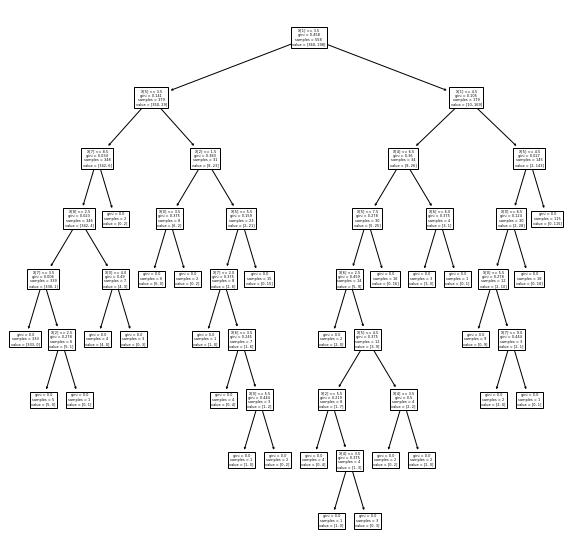

In [99]:
#Show Tree
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(10, 10))

tree.plot_tree(fitted_model)
plt.show()

In [121]:
fitted_model.score(X_train,y_train),fitted_model.score(X_test,y_test)

(0.9541547277936963, 0.9598853868194842)

In [115]:
Y_pred_train = fitted_model.predict(X_train)
Y_pred_test  = fitted_model.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred_test)

0.9598853868194842

In [102]:

from sklearn.metrics import roc_curve,auc,roc_auc_score
#On veux la courbe ROC
fpr_train, tpr_train, thr_train = roc_curve(y_train,Y_pred_train)
fpr_test, tpr_test, thr_test = roc_curve(y_test,Y_pred_test)

#On calcul l'air avec la courbe
auc_train2 = auc(fpr_train, tpr_train)
auc_test2 = auc(fpr_test, tpr_test)

#On veut l'air sous la courbe
auc_train = roc_auc_score(y_train, Y_pred_train)
auc_test = roc_auc_score(y_test, Y_pred_test)

(auc_train,auc_test)

(1.0, 0.9444977223687364)

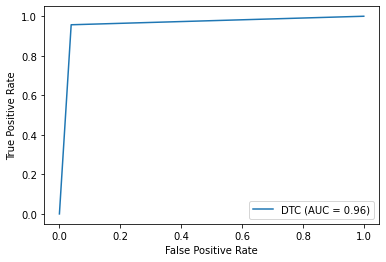

In [122]:
from sklearn.metrics import plot_roc_curve
#On dessine la courbe :
plot_roc_curve(fitted_model,X_test,y_test,name='DTC')

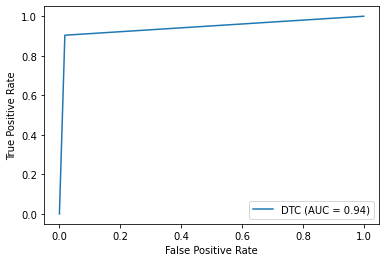

In [123]:
plot_roc_curve(fitted_model,X_train,y_train,name='DTC')

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)
fitted_rf = rf.fit(X_train,y_train)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,fitted_rf.predict(X_test))

0.9713467048710601

In [126]:
from sklearn import metrics
fpr,tpr,thr = metrics.roc_curve(y_test, fitted_rf.predict(X_test))
metrics.auc(fpr, tpr)

0.9742119283705787

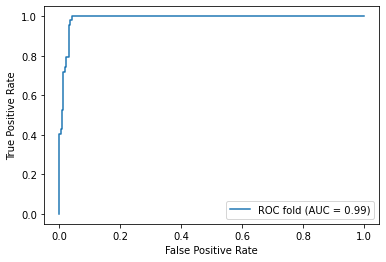

In [127]:
fitted_rf.predict_proba(X_test)

from sklearn.metrics import plot_roc_curve
viz = plot_roc_curve(fitted_rf, X_test, y_test,
                         name='ROC fold')